- 주어진 가상의 고객행동/구매 data를 가지고 사전 행동을 분석하고 EDA 결과 및 행동 특성에 따라 유형화(고객 sgmentation)

1️⃣ 차량 정보

- 충성고객인 주로 SUV나 RV 중심의 소비 패턴을 보일 수 있음
- 개인 사업자가 차지하는 구매 빈도가 압도적으로 높아 개인고객에게 구매 빈도 가중치를 높이는 등의 전처리
- 계약일자가 2022년도에 중심적으로 나타남

2️⃣ 연령대별 구매 패턴

- 30,40,50대 순서로 고객이 가장 많음
- 개인사업자가 아닌 고객이 주를 이루나, 개인 사업자 고객은 구매 횟수나 매출에 기여하는 바가 높을 수 있음

3️⃣ 관심 차량 vs 실제 구매 차량

- 관심을 보인 차량과 실제 구매 차량이 일치하지 않는 경우가 많음/구매 전 결정이 바뀌는 경향이 있음

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from pathlib import Path
from os import getcwd
import warnings
warnings.filterwarnings(action='ignore')

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

dataPath = Path(getcwd()).parent

##### 차량정보 EDA

In [62]:
#차량 정보
DM1_DS_99_HCKRTHN_CNTT_F = f'{dataPath}/data/DM1_DS_99_HCKRTHN_CNTT_F.csv'
carinfo_df = pd.read_csv(DM1_DS_99_HCKRTHN_CNTT_F,encoding='cp949')
carinfo_df.head(5)

,CAR_ID,CNTT_DT,VEHL_CD,DOM_MDL_NM,PAC_SCN_NM,SALE_CGRD_NM,SALE_TRIM_NM,SALE_ENG_NM,CUS_ID
0,C98N3HQIS4G67,20210302,IG,그랜저IG 자가용 하이브리드 PREMIUM A/T F/L,승용,대형,PREMIUM,하이브리드,APW9ZIWDQQNYY8LK
1,C18MB8E9FEO8O,20220117,M5,포터II 디젤 슈퍼캡 초장축 카고 스타일 매뉴얼 22MY,소형상용,소형트럭,스타일,디젤,AGBCIS57DPHRRP9X
2,CXMMZDI2JRWCX,20200511,DN,쏘나타DN8 20MY 자가용 가솔린 2.0 CVVL 프리미엄,승용,중형,프리미엄 패밀리,가솔린 2.0 CVVL,A4W2GG6ZLMZ81DB3
3,C934SRCKF4H44,20220104,NX,The all-new 투싼 하이브리드 인스퍼레이션 2WD A,RV,준중형SUV,인스퍼레이션,하이브리드,ATHNS3F4766FKDW3
4,CU1BBNUEHOTDM,20220210,JJ,The All new G80 가솔린 2.5T AWD 19인치,승용,대형,19인치A SDS2,가솔린 2.5T,A8D7NHFKA3K83QH4


In [63]:
carinfo_df.rename(columns = {
    "CAR_ID":"차량ID",
    "CNTT_DT":"계약일자",
    "VEHL_CD":"차종코드",
    "DOM_MDL_NM":"모델명",
    "PAC_SCN_NM":"승상구분명",
    "SALE_CGRD_NM":"판매차급명",
    "SALE_TRIM_NM":"판매트림명",
    "SALE_ENG_NM":"판매엔진명",
    "CUS_ID":"고객ID",
}, inplace = True)
carinfo_df

,차량ID,계약일자,차종코드,모델명,승상구분명,판매차급명,판매트림명,판매엔진명,고객ID
0,C98N3HQIS4G67,20210302,IG,그랜저IG 자가용 하이브리드 PREMIUM A/T F/L,승용,대형,PREMIUM,하이브리드,APW9ZIWDQQNYY8LK
1,C18MB8E9FEO8O,20220117,M5,포터II 디젤 슈퍼캡 초장축 카고 스타일 매뉴얼 22MY,소형상용,소형트럭,스타일,디젤,AGBCIS57DPHRRP9X
2,CXMMZDI2JRWCX,20200511,DN,쏘나타DN8 20MY 자가용 가솔린 2.0 CVVL 프리미엄,승용,중형,프리미엄 패밀리,가솔린 2.0 CVVL,A4W2GG6ZLMZ81DB3
3,C934SRCKF4H44,20220104,NX,The all-new 투싼 하이브리드 인스퍼레이션 2WD A,RV,준중형SUV,인스퍼레이션,하이브리드,ATHNS3F4766FKDW3
4,CU1BBNUEHOTDM,20220210,JJ,The All new G80 가솔린 2.5T AWD 19인치,승용,대형,19인치A SDS2,가솔린 2.5T,A8D7NHFKA3K83QH4
...,...,...,...,...,...,...,...,...,...
72780,CF5XYYWGM4962,20111025,MD,아반떼MD 자가용 가솔린 1.6 A 오토 11MY,승용,준중형,A,가솔린 1.6,ACWSOYPRRWLHL2I1
72781,C91VRA1RAE6EL,20160504,TL,투싼TL 디젤 1.7 Premium 2WD DCT,RV,준중형SUV,Premium,디젤 1.7,ACWSOYPRRWLHL2I1
72782,COAFAA0KQ2F1N,20220203,NX,The all-new 투싼 하이브리드 프리미엄 2WD A/T,RV,준중형SUV,프리미엄,하이브리드,AF3D2H4N6PO5PY24
72783,COBZ4YAULMIMD,20100729,JA,G스타렉스 디젤 12인승 웨건 자가용 CVX 오토 11MY,소형상용,소형버스,CVX,디젤,APXWMUKE36MD8PX1


In [64]:
carinfo_df.isna().any()

차량ID     False
계약일자     False
차종코드     False
모델명      False
승상구분명    False
판매차급명    False
판매트림명     True
판매엔진명     True
고객ID     False
dtype: bool

In [65]:
carinfo_df.isnull().sum()

차량ID      0
계약일자      0
차종코드      0
모델명       0
승상구분명     0
판매차급명     0
판매트림명    11
판매엔진명    73
고객ID      0
dtype: int64

In [83]:
carinfo_df.nunique()

차량ID     72785
계약일자      3713
차종코드        59
모델명       2515
승상구분명        3
판매차급명       12
판매트림명      326
판매엔진명       79
고객ID     51397
dtype: int64

In [68]:
import datetime
carinfo_df['계약일자'] = carinfo_df['계약일자'].astype('str')
carinfo_df['계약일자'] = carinfo_df['계약일자'].apply(lambda _ : datetime.datetime.strptime(_,'%Y%m%d'))

In [69]:
carinfo_df

,차량ID,계약일자,차종코드,모델명,승상구분명,판매차급명,판매트림명,판매엔진명,고객ID
0,C98N3HQIS4G67,2021-03-02,IG,그랜저IG 자가용 하이브리드 PREMIUM A/T F/L,승용,대형,PREMIUM,하이브리드,APW9ZIWDQQNYY8LK
1,C18MB8E9FEO8O,2022-01-17,M5,포터II 디젤 슈퍼캡 초장축 카고 스타일 매뉴얼 22MY,소형상용,소형트럭,스타일,디젤,AGBCIS57DPHRRP9X
2,CXMMZDI2JRWCX,2020-05-11,DN,쏘나타DN8 20MY 자가용 가솔린 2.0 CVVL 프리미엄,승용,중형,프리미엄 패밀리,가솔린 2.0 CVVL,A4W2GG6ZLMZ81DB3
3,C934SRCKF4H44,2022-01-04,NX,The all-new 투싼 하이브리드 인스퍼레이션 2WD A,RV,준중형SUV,인스퍼레이션,하이브리드,ATHNS3F4766FKDW3
4,CU1BBNUEHOTDM,2022-02-10,JJ,The All new G80 가솔린 2.5T AWD 19인치,승용,대형,19인치A SDS2,가솔린 2.5T,A8D7NHFKA3K83QH4
...,...,...,...,...,...,...,...,...,...
72780,CF5XYYWGM4962,2011-10-25,MD,아반떼MD 자가용 가솔린 1.6 A 오토 11MY,승용,준중형,A,가솔린 1.6,ACWSOYPRRWLHL2I1
72781,C91VRA1RAE6EL,2016-05-04,TL,투싼TL 디젤 1.7 Premium 2WD DCT,RV,준중형SUV,Premium,디젤 1.7,ACWSOYPRRWLHL2I1
72782,COAFAA0KQ2F1N,2022-02-03,NX,The all-new 투싼 하이브리드 프리미엄 2WD A/T,RV,준중형SUV,프리미엄,하이브리드,AF3D2H4N6PO5PY24
72783,COBZ4YAULMIMD,2010-07-29,JA,G스타렉스 디젤 12인승 웨건 자가용 CVX 오토 11MY,소형상용,소형버스,CVX,디젤,APXWMUKE36MD8PX1


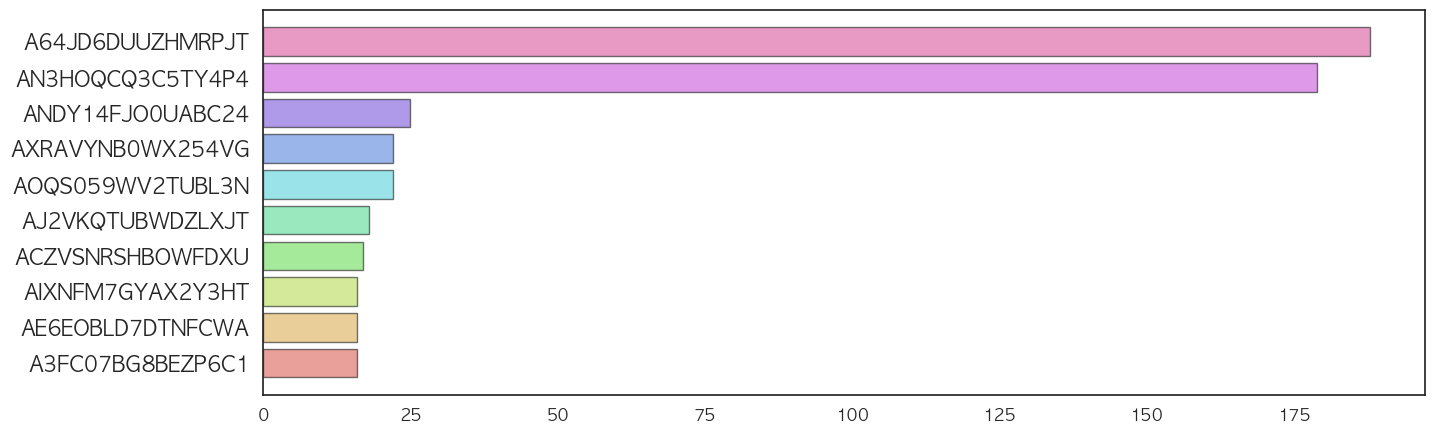

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
 
top_data = Counter(carinfo_df['고객ID']).most_common()
top_data = top_data[:10]
data = [x[1] for x in top_data]
cus = [x[0] for x in top_data]
 
cus.reverse()
data.reverse()

fig =plt.figure(figsize=(15,5))

fig.set_facecolor('white')
colors = sns.color_palette('hls',len(data))
plt.yticks(fontsize=15)
plt.xticks(fontsize=12)

plt.barh(cus, data, color=colors,alpha=0.6,edgecolor='k')
plt.show()

In [71]:
# 상위 2명의 고객은 개인사업자로 개인고객들과 분류시 큰 편차를 줄 것으로 예상
carinfo_df[carinfo_df['고객ID']== "A64JD6DUUZHMRPJT"]
carinfo_df[carinfo_df['고객ID']== "AN3HOQCQ3C5TY4P4"]

,차량ID,계약일자,차종코드,모델명,승상구분명,판매차급명,판매트림명,판매엔진명,고객ID
3623,C8DDA4L4LL7Q5,2020-07-30,M5,포터II 디젤 슈퍼캡 초장축 카고 프리미엄 오토 2020,소형상용,소형트럭,프리미엄,디젤,AN3HOQCQ3C5TY4P4
3624,C9YWJ28F8W8W7,2020-04-14,M5,포터II 디젤 슈퍼캡 초장축 카고 프리미엄 오토 2020,소형상용,소형트럭,프리미엄,디젤,AN3HOQCQ3C5TY4P4
3625,CVFSOR30VK4A7,2020-04-21,M5,포터II 디젤 슈퍼캡 초장축 카고 프리미엄 오토 2020,소형상용,소형트럭,프리미엄,디젤,AN3HOQCQ3C5TY4P4
3626,C0MZBAR7ZCFRZ,2020-04-20,M5,포터II 디젤 슈퍼캡 초장축 카고 프리미엄 오토 2020,소형상용,소형트럭,프리미엄,디젤,AN3HOQCQ3C5TY4P4
3627,CYTLDEHCHMTRO,2020-08-21,M5,포터II 디젤 슈퍼캡 초장축 카고 프리미엄 오토 2020,소형상용,소형트럭,프리미엄,디젤,AN3HOQCQ3C5TY4P4
...,...,...,...,...,...,...,...,...,...
3797,CKP59W5LIYXQ7,2014-06-16,M5,포터II 디젤 슈퍼캡 초장축 카고 슈퍼 매뉴얼 12MY,소형상용,소형트럭,슈퍼,디젤,AN3HOQCQ3C5TY4P4
3798,C14ZIN1YEKGXH,2014-08-27,M5,포터II 디젤 슈퍼캡 초장축 카고 슈퍼 매뉴얼 12MY,소형상용,소형트럭,슈퍼,디젤,AN3HOQCQ3C5TY4P4
3799,C55SXJM80W4HU,2014-08-20,M5,포터II 디젤 슈퍼캡 초장축 카고 슈퍼 매뉴얼 12MY,소형상용,소형트럭,슈퍼,디젤,AN3HOQCQ3C5TY4P4
3800,C8FOZXYH4DSNQ,2014-07-08,M5,포터II 디젤 슈퍼캡 초장축 카고 슈퍼 매뉴얼 12MY,소형상용,소형트럭,슈퍼,디젤,AN3HOQCQ3C5TY4P4


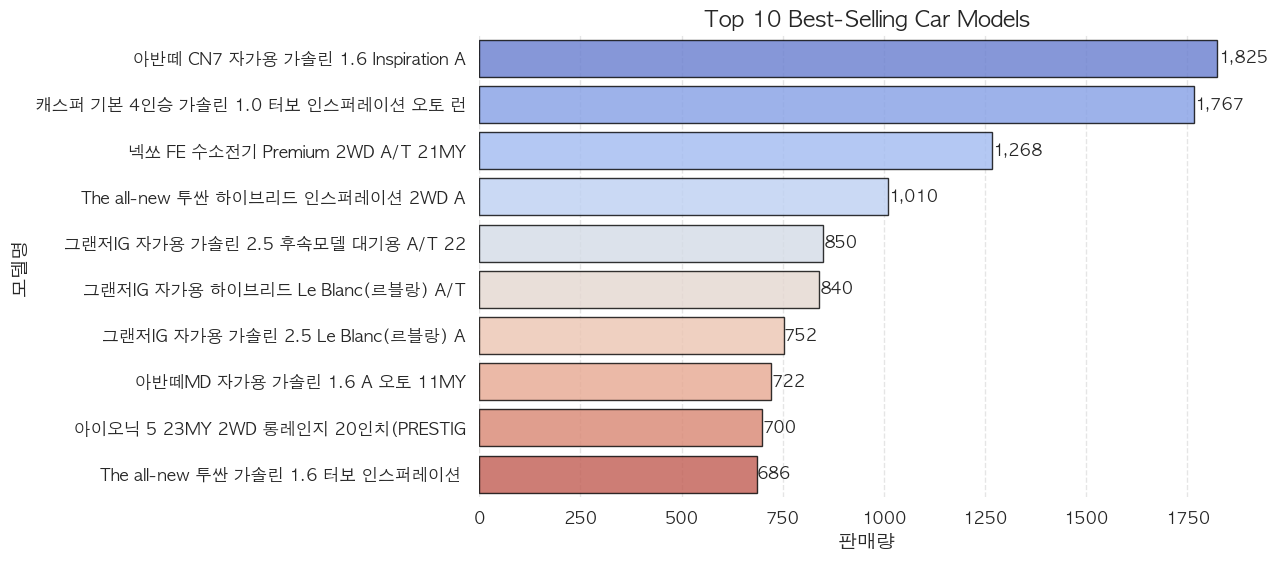

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# 상위 10개 모델 추출
top_data = Counter(carinfo_df['모델명']).most_common(10)

# 데이터 변환
data = [x[1] for x in top_data]  # 판매량
models = [x[0] for x in top_data]  # 모델명

plt.figure(figsize=(10, 6))
colors = sns.color_palette('coolwarm', len(data))  # 색상 설정

sns.barplot(x=data, y=models, palette=colors, edgecolor='black', alpha=0.8)

plt.title("Top 10 Best-Selling Car Models", fontsize=16, fontweight='bold')
plt.xlabel("판매량", fontsize=14)
plt.ylabel("모델명", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for index, value in enumerate(data):
    plt.text(value + 0.5, index, f"{value:,}", fontsize=12, verticalalignment='center')

sns.despine(left=True, bottom=True)  # 테두리 제거
plt.grid(axis='x', linestyle='--', alpha=0.5)  # x축에 점선 추가

plt.show()

In [73]:
carinfo_df

,차량ID,계약일자,차종코드,모델명,승상구분명,판매차급명,판매트림명,판매엔진명,고객ID
0,C98N3HQIS4G67,2021-03-02,IG,그랜저IG 자가용 하이브리드 PREMIUM A/T F/L,승용,대형,PREMIUM,하이브리드,APW9ZIWDQQNYY8LK
1,C18MB8E9FEO8O,2022-01-17,M5,포터II 디젤 슈퍼캡 초장축 카고 스타일 매뉴얼 22MY,소형상용,소형트럭,스타일,디젤,AGBCIS57DPHRRP9X
2,CXMMZDI2JRWCX,2020-05-11,DN,쏘나타DN8 20MY 자가용 가솔린 2.0 CVVL 프리미엄,승용,중형,프리미엄 패밀리,가솔린 2.0 CVVL,A4W2GG6ZLMZ81DB3
3,C934SRCKF4H44,2022-01-04,NX,The all-new 투싼 하이브리드 인스퍼레이션 2WD A,RV,준중형SUV,인스퍼레이션,하이브리드,ATHNS3F4766FKDW3
4,CU1BBNUEHOTDM,2022-02-10,JJ,The All new G80 가솔린 2.5T AWD 19인치,승용,대형,19인치A SDS2,가솔린 2.5T,A8D7NHFKA3K83QH4
...,...,...,...,...,...,...,...,...,...
72780,CF5XYYWGM4962,2011-10-25,MD,아반떼MD 자가용 가솔린 1.6 A 오토 11MY,승용,준중형,A,가솔린 1.6,ACWSOYPRRWLHL2I1
72781,C91VRA1RAE6EL,2016-05-04,TL,투싼TL 디젤 1.7 Premium 2WD DCT,RV,준중형SUV,Premium,디젤 1.7,ACWSOYPRRWLHL2I1
72782,COAFAA0KQ2F1N,2022-02-03,NX,The all-new 투싼 하이브리드 프리미엄 2WD A/T,RV,준중형SUV,프리미엄,하이브리드,AF3D2H4N6PO5PY24
72783,COBZ4YAULMIMD,2010-07-29,JA,G스타렉스 디젤 12인승 웨건 자가용 CVX 오토 11MY,소형상용,소형버스,CVX,디젤,APXWMUKE36MD8PX1


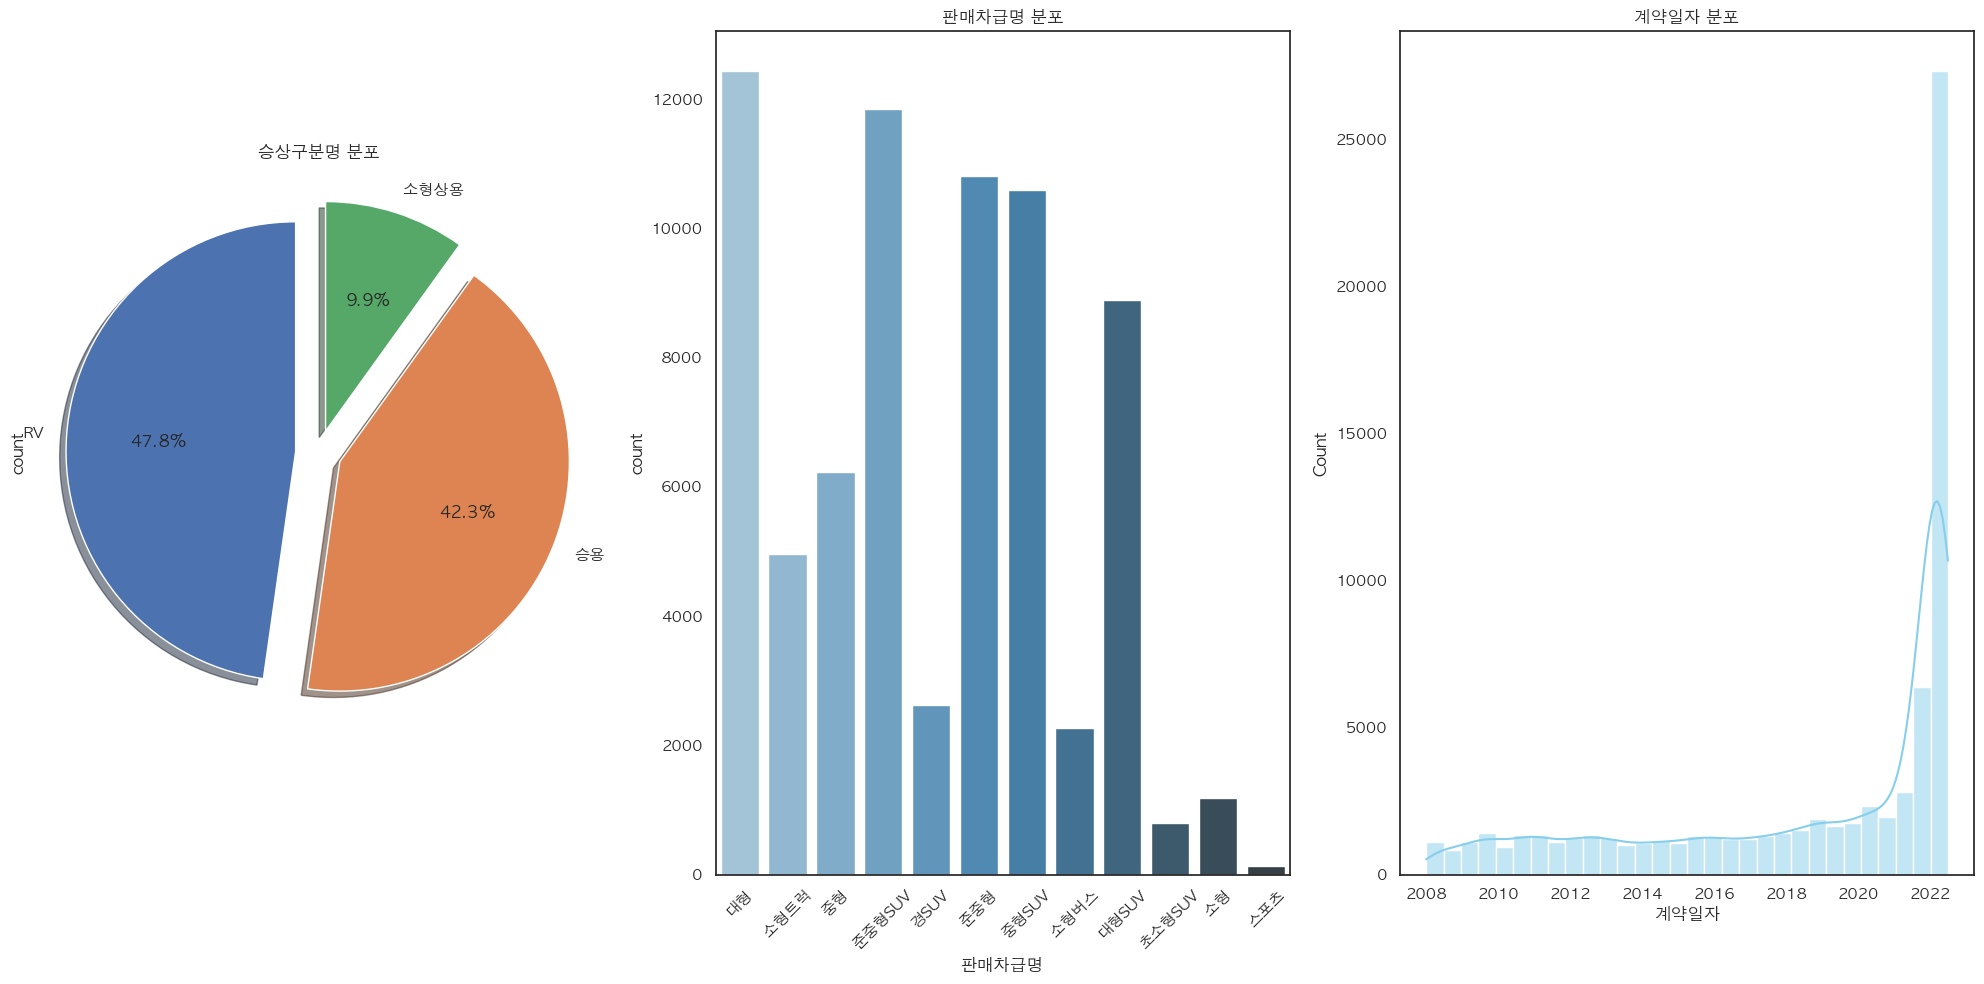

In [ ]:
carinfo_df["계약일자"] = pd.to_datetime(carinfo_df["계약일자"], errors="coerce")

f, ax = plt.subplots(1, 3, figsize=(20, 10))

carinfo_df['승상구분명'].value_counts().plot.pie(
    autopct='%1.1f%%', ax=ax[0], shadow=True, startangle=90,
    explode=[0.1] * min(5, len(carinfo_df['승상구분명'].unique()))
)
ax[0].set_title('승상구분명 분포')

sns.countplot(x='판매차급명', data=carinfo_df, ax=ax[1], palette="Blues_d")
ax[1].set_title('판매차급명 분포')
ax[1].tick_params(axis='x', rotation=45)

sns.histplot(data=carinfo_df, x='계약일자', ax=ax[2], kde=True, bins=30, color="skyblue")
ax[2].set_title('계약일자 분포')

plt.tight_layout()
plt.show()

<Figure size 1500x600 with 0 Axes>

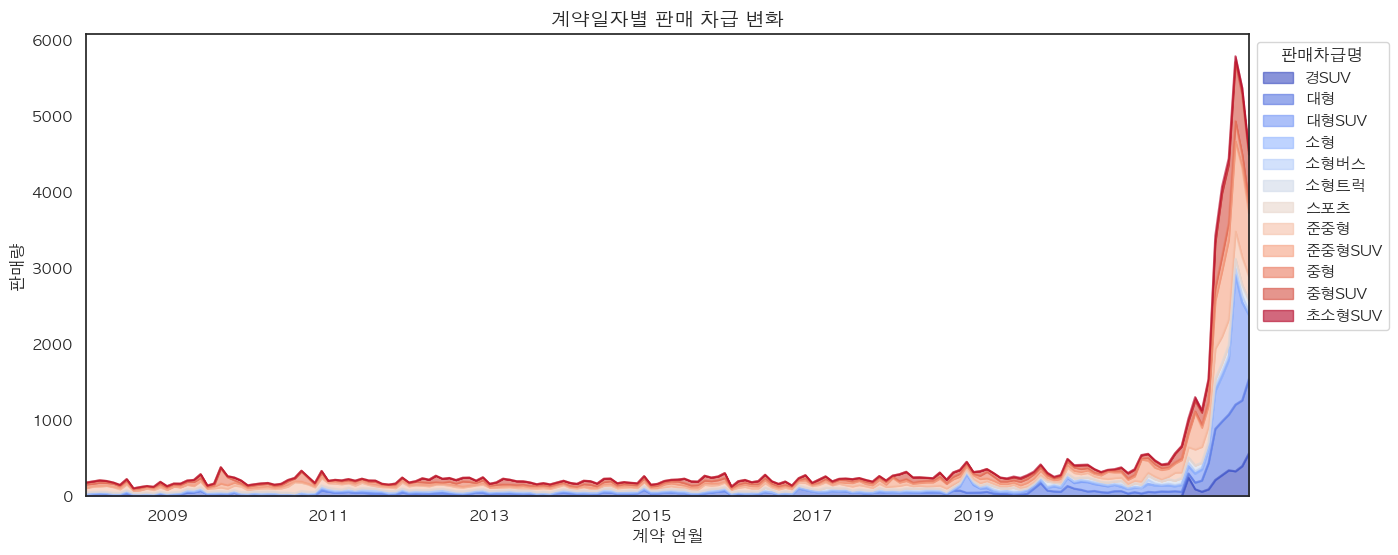

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
차급별_판매량 = carinfo_df.groupby([carinfo_df['계약일자'].dt.to_period("M"), '판매차급명']).size().unstack().fillna(0)
차급별_판매량.plot(kind='area', stacked=True, colormap='coolwarm', alpha=0.6, figsize=(15, 6))
plt.title("계약일자별 판매 차급 변화", fontsize=14)
plt.xlabel("계약 연월")
plt.ylabel("판매량")
plt.legend(title="판매차급명", bbox_to_anchor=(1, 1))
plt.show()

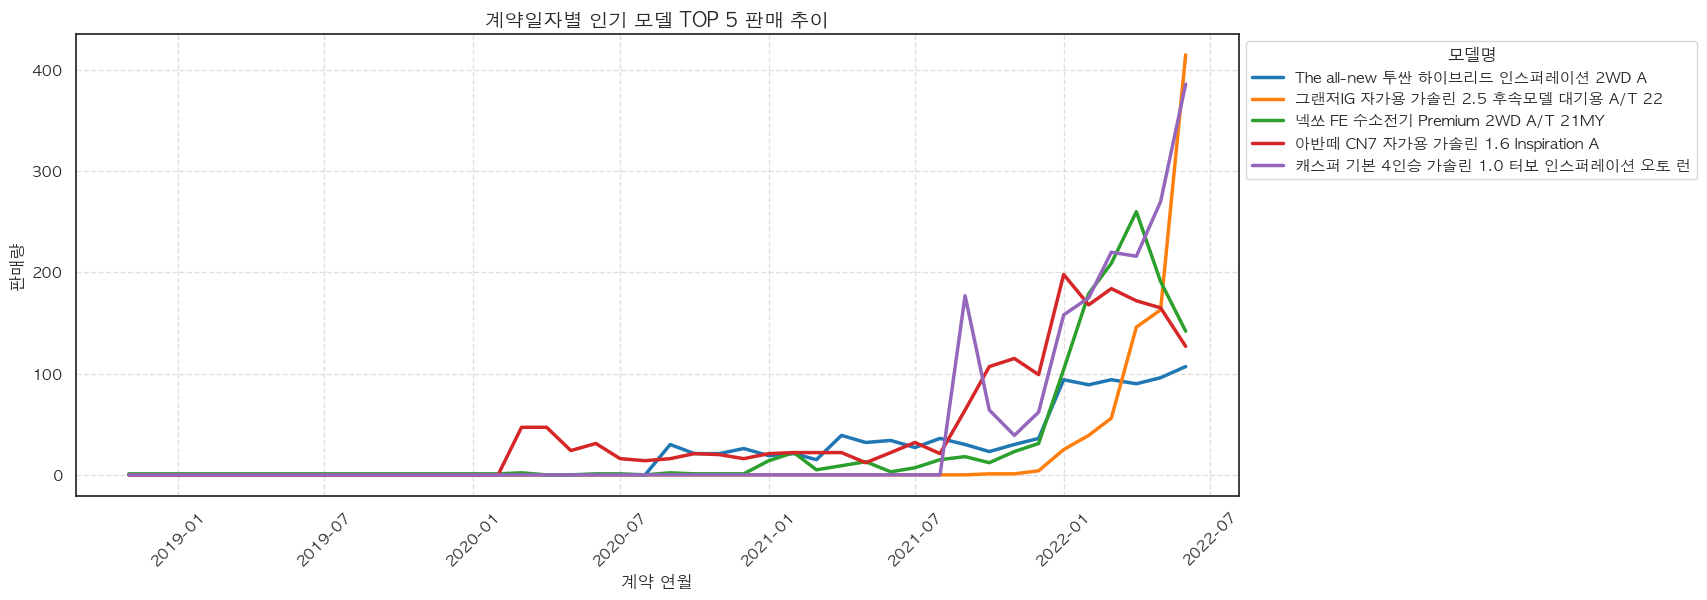

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 상위 5개 모델 선택
top_5_models = carinfo_df['모델명'].value_counts().index[:5]
top_5_df = carinfo_df[carinfo_df['모델명'].isin(top_5_models)]

sales_trend = top_5_df.groupby([top_5_df['계약일자'].dt.to_period("M"), '모델명']).size().unstack().fillna(0)
sales_trend.index = sales_trend.index.to_timestamp()
sales_trend = sales_trend.reset_index().melt(id_vars='계약일자', var_name='모델명', value_name='판매량')

# 시각화
plt.figure(figsize=(15, 6))
sns.lineplot(data=sales_trend, x="계약일자", y="판매량", hue="모델명", palette="tab10", linewidth=2.5)
plt.title("계약일자별 인기 모델 TOP 5 판매 추이", fontsize=14)
plt.xlabel("계약 연월")
plt.ylabel("판매량")
plt.xticks(rotation=45)
plt.legend(title="모델명", bbox_to_anchor=(1, 1))
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

##### 고객 접촉 이력 정보 EDA

In [88]:
#고객 접촉 이력 정보
DM1_DS_99_HCKRTHN_DEMO_F = f'{dataPath}/data/DM1_DS_99_HCKRTHN_DEMO_F.csv'
cus = pd.read_csv(DM1_DS_99_HCKRTHN_DEMO_F,encoding='cp949')

cus.rename(columns = {
    "CUS_ID":"고객ID",
    "PSN_BIZR_YN":"개인사업자여부",
    "TYMD":"생년",
    "SEX_SCN_NM":"성별구분명",
}, inplace = True)
cus

,고객ID,개인사업자여부,생년,성별구분명
0,AMR9MOP756HN28V9,N,1990.0,여자
1,AL2E2HLDMN50FN9E,N,1955.0,남자
2,APW9ZIWDQQNYY8LK,N,1992.0,남자
3,AGBCIS57DPHRRP9X,N,1977.0,남자
4,A4W2GG6ZLMZ81DB3,N,1974.0,여자
...,...,...,...,...
89575,AF3D2H4N6PO5PY24,N,1968.0,남자
89576,AQSF1UNGCVX5CVJH,N,1984.0,남자
89577,ARJA0WA3EEXVZQFW,N,1982.0,남자
89578,APXWMUKE36MD8PX1,N,1984.0,남자


Text(0, 0.5, '')

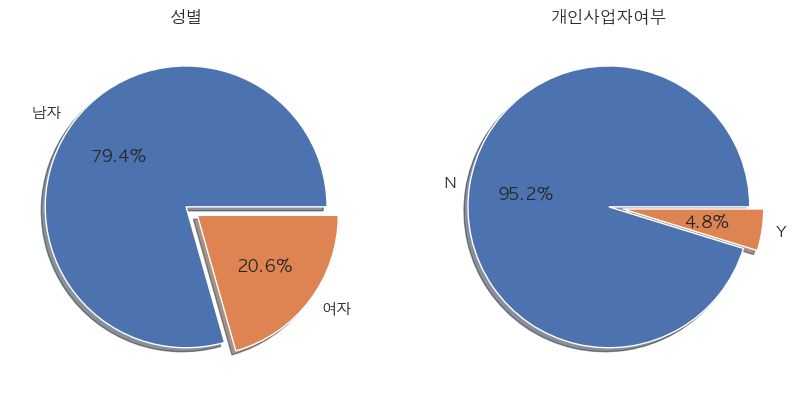

In [90]:
f,ax=plt.subplots(1,2,figsize=(10,5))

cus['성별구분명'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('성별')
ax[0].set_ylabel('')

cus['개인사업자여부'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[1].set_title('개인사업자여부')
ax[1].set_ylabel('')

In [91]:
cus.nunique()

고객ID       89580
개인사업자여부        2
생년            81
성별구분명          2
dtype: int64

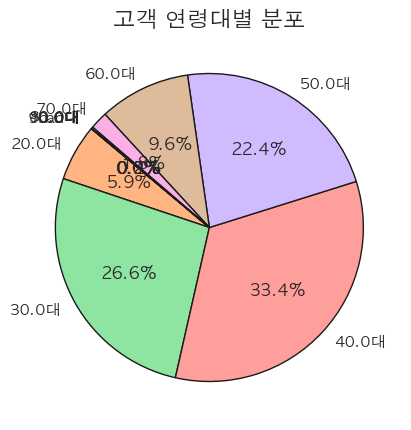

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

current_year = pd.Timestamp.now().year

def age_group(birth_year):
    age = current_year - birth_year
    return f"{(age // 10) * 10}대"

cus["연령대"] = cus["생년"].apply(age_group)

age_counts = cus["연령대"].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(5, 5))
fig.set_facecolor("white")

colors = sns.color_palette("pastel", len(age_counts))
ax.pie(age_counts, labels=age_counts.index, autopct="%.1f%%", colors=colors, startangle=140, wedgeprops={"edgecolor": "k", "linewidth": 1})

ax.set_title("고객 연령대별 분포", fontsize=16, fontweight="bold")

plt.show()

##### 채널 인입 데이터 EDA

In [97]:
DM1_DS_99_HCKRTHN_PROS_ITG_F = f'{dataPath}/data/DM1_DS_99_HCKRTHN_PROS_ITG_F.csv'
inc = pd.read_csv(DM1_DS_99_HCKRTHN_PROS_ITG_F,encoding='cp949')
inc.rename(columns = {
    "CUS_ID":"고객ID",
    "CASE_ID":"접촉ID",
    "INP_DTM":"인입일시",
    "CHAN_SCN_NM":"채널구분명",
    "CHAN_DTL_SCN_NM":"채널상세구분명",
    "IRD_VEHL_CD":"관심차량",
}, inplace = True)
inc

,고객ID,접촉ID,인입일시,채널구분명,채널상세구분명,관심차량
0,AKZWMZWJ3HTYTOSS,BK69SK0W9NOEXIQU,2022-01-09 16:00:00,시승시스템,시승,JW
1,AAMN599HM0XFRIRK,BCPT4WL1QHD8LK1M,2022-01-12 10:00:00,시승시스템,시승,QX
2,AP8ERGN3MGXWD0W1,BUYAFEX9M7PATNIF,2022-01-09 18:41:28,현대닷컴,견적,NX
3,ASIYQ5LM878U45P5,BVCR9MK9FIRXEUCL,2022-01-11 18:41:21,이벤트시스템,구매상담신청,NaN
4,A8KWVKZPITWG0PCO,BNQ8X4SUSC120MRF,2022-01-10 09:03:09,판매기회_상담완료,지속관리,JJ
...,...,...,...,...,...,...
159166,AS7OEWKWHIAK2WZ1,BS94L650O9PWIXE1,2022-03-07 18:09:35,판매기회_상담완료,지속관리,NX
159167,AVFD9EAOXP2BYXQY,BIL593DS4LTUT2JP,2022-02-03 10:23:16,판매기회_상담완료,지속관리,NaN
159168,AA9FVJGB2L5OG3IW,B26O6YSJL6XOIHIZ,2022-03-14 11:05:38,판매기회_상담완료,지속관리,LC
159169,AIJ2KUXDXEV0VDUS,BXQDUBABH92L3XOQ,2022-05-09 10:04:17,판매기회_상담완료,지속관리,NaN


In [98]:
inc_1 = inc[['고객ID','채널구분명','채널상세구분명','관심차량']]

In [ ]:
inc_1

,고객ID,채널구분명,채널상세구분명,관심차량
0,AKZWMZWJ3HTYTOSS,시승시스템,시승,JW
1,AAMN599HM0XFRIRK,시승시스템,시승,QX
2,AP8ERGN3MGXWD0W1,현대닷컴,견적,NX
3,ASIYQ5LM878U45P5,이벤트시스템,구매상담신청,NaN
4,A8KWVKZPITWG0PCO,판매기회_상담완료,지속관리,JJ
...,...,...,...,...
159166,AS7OEWKWHIAK2WZ1,판매기회_상담완료,지속관리,NX
159167,AVFD9EAOXP2BYXQY,판매기회_상담완료,지속관리,NaN
159168,AA9FVJGB2L5OG3IW,판매기회_상담완료,지속관리,LC
159169,AIJ2KUXDXEV0VDUS,판매기회_상담완료,지속관리,NaN


In [ ]:
inc.nunique()

고객ID        94367
접촉ID       142059
인입일시       101831
채널구분명           6
채널상세구분명         9
관심차량           34
dtype: int64

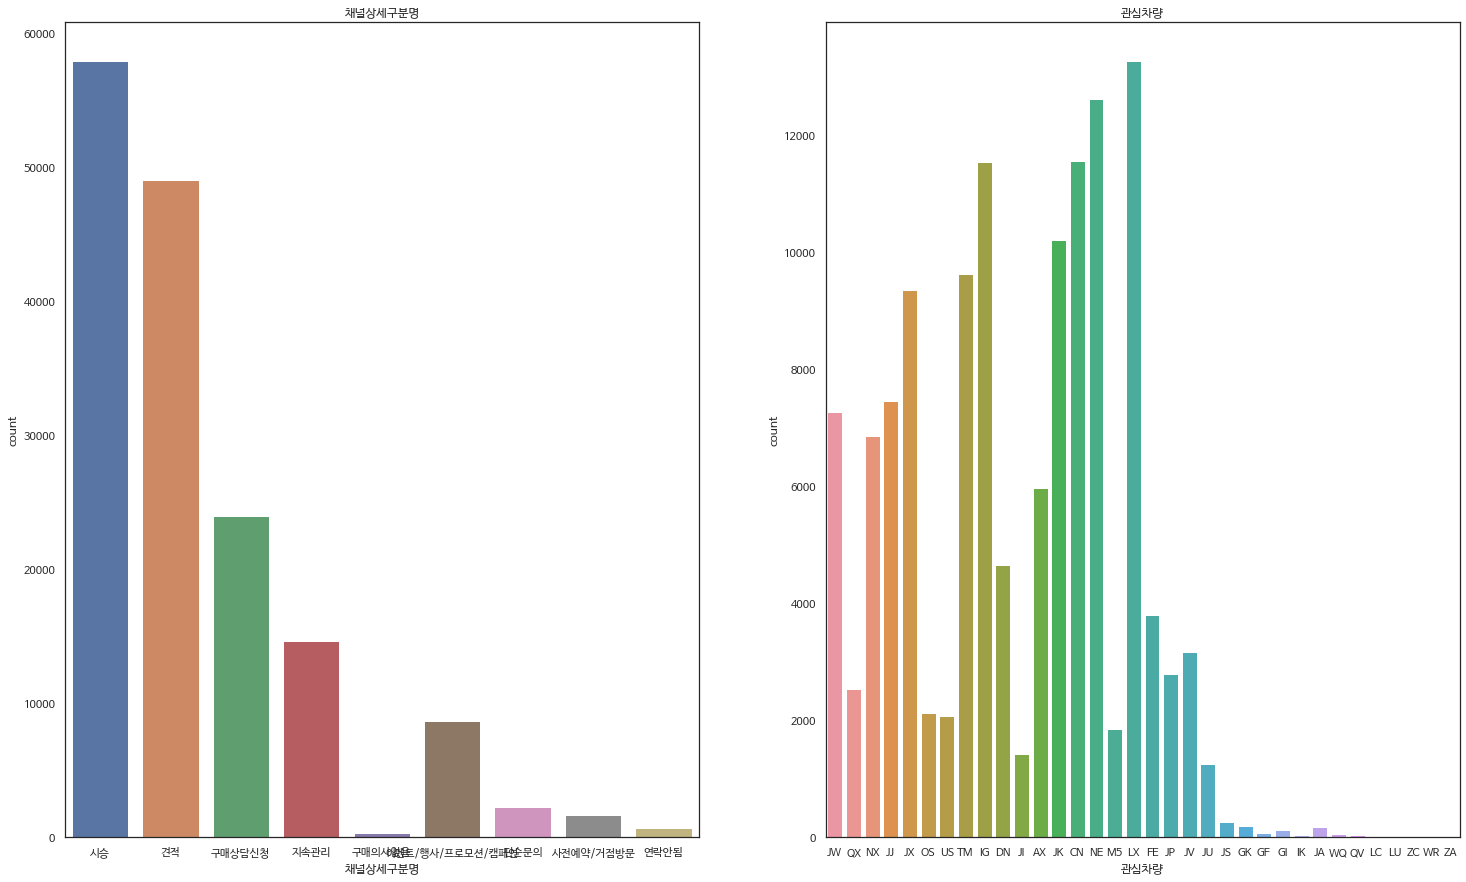

In [ ]:
f,ax=plt.subplots(1,2,figsize=(25,15))

sns.countplot('채널상세구분명',data=inc, ax=ax[0])
ax[0].set_title('채널상세구분명')

sns.countplot('관심차량',data=inc, ax=ax[1])
ax[1].set_title('관심차량')
plt.show()

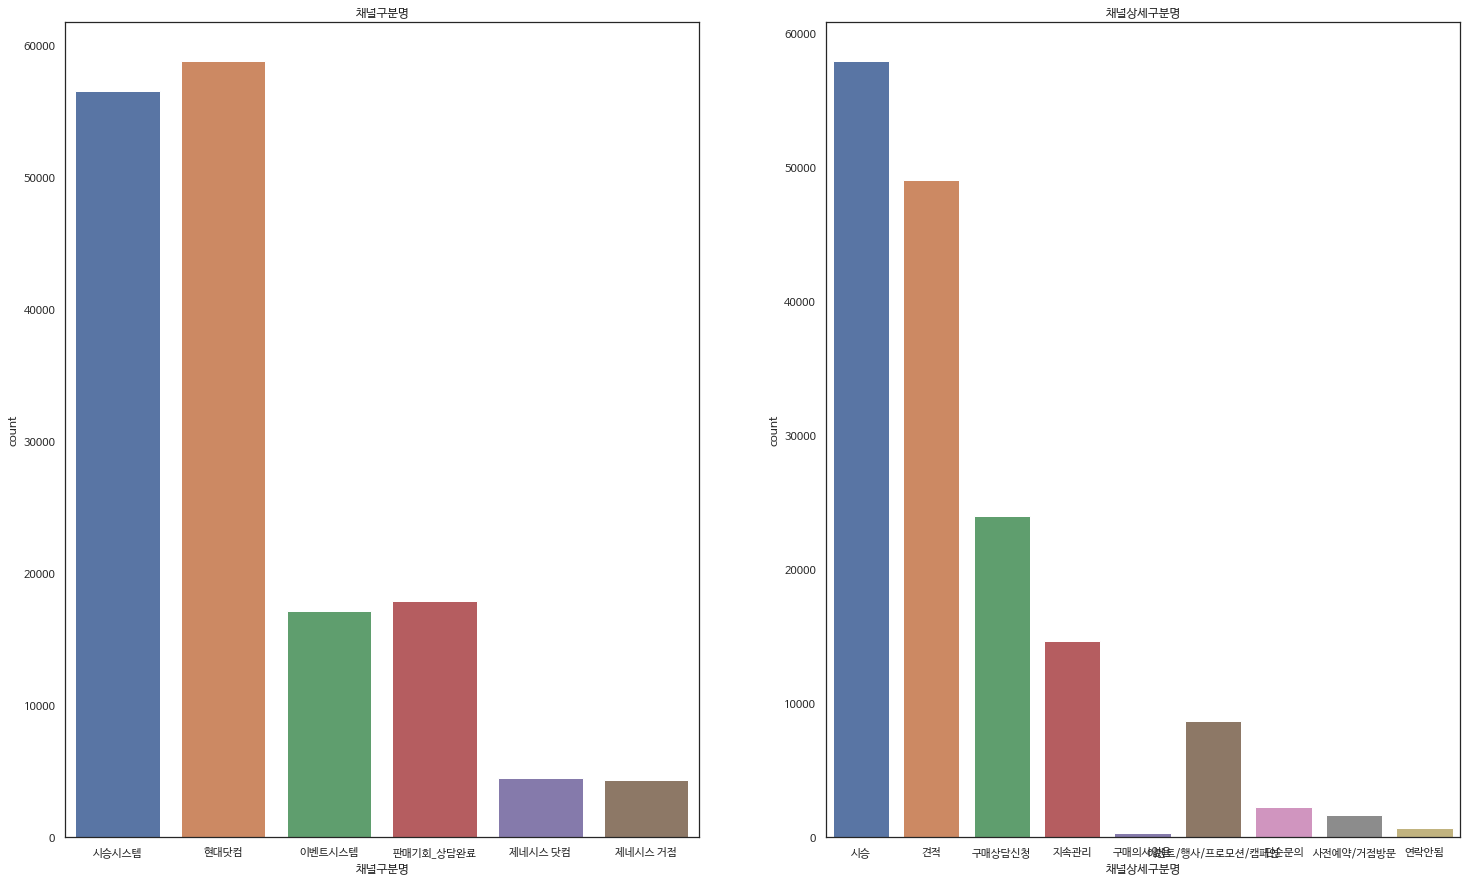

In [ ]:
f,ax=plt.subplots(1,2,figsize=(25,15))

sns.countplot('채널구분명',data=inc, ax=ax[0])
ax[0].set_title('채널구분명')

sns.countplot('채널상세구분명',data=inc, ax=ax[1])
ax[1].set_title('채널상세구분명')
plt.show()

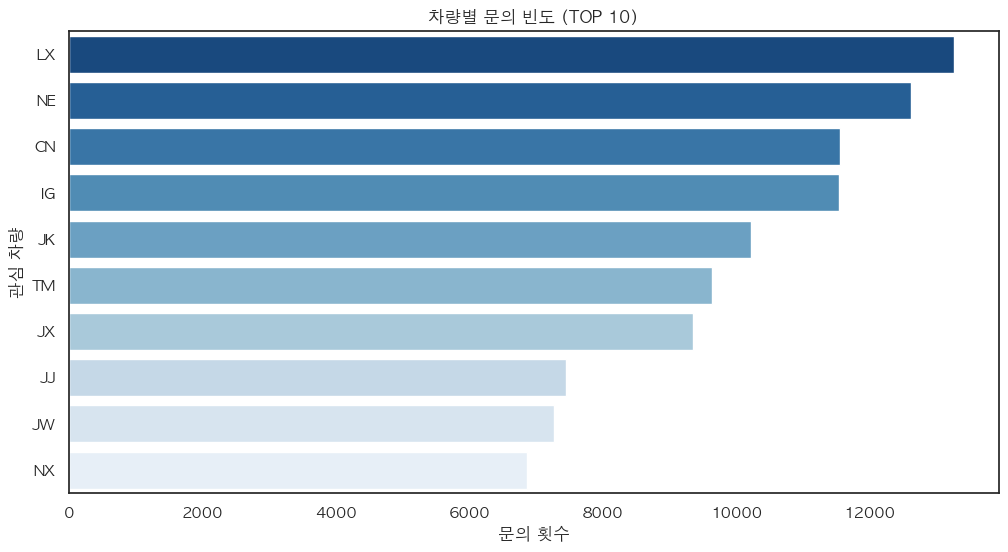

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# 차량별 문의 횟수 집계
car_inquiry_counts = inc.groupby("관심차량")["접촉ID"].count().reset_index()
car_inquiry_counts = car_inquiry_counts.sort_values(by="접촉ID", ascending=False)[:10]

plt.figure(figsize=(12, 6))
sns.barplot(x="접촉ID", y="관심차량", data=car_inquiry_counts, palette="Blues_r")
plt.xlabel("문의 횟수")
plt.ylabel("관심 차량")
plt.title("차량별 문의 빈도 (TOP 10)")
plt.show()
